## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
# Looking at `head` for initial insight
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
# Looking at 'info' to check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [4]:
# Looking at 'describe' to check weather or not timestamp may easily be converted 
df.describe(include='all')

,user_id,timestamp,group,landing_page,converted
count,294478.000000,294478,294478,294478,294478.000000
unique,NaN,294478,2,2,NaN
top,NaN,2017-01-20 05:37:27.414183,treatment,old_page,NaN
freq,NaN,1,147276,147239,NaN
mean,787974.124733,NaN,NaN,NaN,0.119659
std,91210.823776,NaN,NaN,NaN,0.324563
min,630000.000000,NaN,NaN,NaN,0.000000
25%,709032.250000,NaN,NaN,NaN,0.000000
50%,787933.500000,NaN,NaN,NaN,0.000000
75%,866911.750000,NaN,NaN,NaN,0.000000


In [5]:
# Conversion of user_id to string and timestamp to datetime
df.user_id = df.user_id.astype(str)
df.timestamp = pd.to_datetime(df.timestamp)

b. Use the below cell to find the number of rows in the dataset.

In [6]:
# First component of `shape` of DataFrame is number of rows
df.shape[0]

294478

c. The number of unique users in the dataset.

In [7]:
# 'nunique' counts unique elements of a column/Series
df.user_id.nunique()

290584

d. The proportion of users converted.

In [8]:
# Taking mean to get the proportion in this special case 
# (and ignoring the non-unique users here)
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [9]:
# Checking and counting the lines where there is either `treatment` or `new_page`, but not both
df[(((df.group == 'treatment') & (df.landing_page != 'new_page')) |
    ((df.group != 'treatment') & (df.landing_page == 'new_page')))].shape[0]

3893

f. Do any of the rows have missing values?

In [10]:
# `isna` checks if the is a `NaN` value in the DataFrame 
df.isna().any().any()

False

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [11]:
# Using 'drop' and the index of filtered DataFrame from above/from 1. to eliminate 
# rows with ambiguous entries
df2 = df.drop(
    df[(((df.group == 'treatment') & (df.landing_page != 'new_page')) |
        ((df.group != 'treatment') & (df.landing_page == 'new_page')))].index).copy()

In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
# Using 'nunique' for 'user_id' as above/as in 1.
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
# Using `value_counts` to identify 'user_id' with double entries
df2.user_id.value_counts().head()

773192    2
814451    1
656234    1
688850    1
893504    1
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [15]:
# Looking up user 773192 
df2[df2.user_id == '773192']
# -> There are two different timestamps for user 773192

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


*-> There are two different timestamps for user 773192*

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
# Remove row 2893 to eliminate double entry for user 773192 (inplace for not changing df2)
df2.drop(index=2893, inplace=True)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
# Using `mean` on `converted` to get average of converting for probability
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
# Filtering `group` column to meet specifications
df2[df2.group == 'control'].converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
# As above
df2[df2.group == 'treatment'].converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [20]:
# Counting the elements in the groups for the both `landing_page` types
df2.groupby('landing_page').count()

,user_id,timestamp,group,converted
landing_page,,,,
new_page,145310,145310,145310,145310
old_page,145274,145274,145274,145274


Proportion and probablitity obviously is 50%

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Answer**  

- Conversion rates of `treatment`-group (11.88%) is by 0.16% marginally lower than in `control`-group (12.04%) (see 4b and 4c), with both testing groups almost equally large. 
- Just given the analysis from above, there is no evidence that the new page design leads to more conversions
- However, further analysis is possible to investigate if other effects (e.g. time-based effects like change aversion) were influencing this result. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Our Hypothesis**  

The null hypothesis is, that the old page has a higher or at least equal conversion rate that the old one:  
**$H_{0}$: $p_{new}$ ${\le}$ $p_{old}$**  
In contrast, it may be proven that the new page has a higher conversion rate with the alternative or "1" hypothesis:  
**$H_{1}$: $p_{new}$ $>$ $p_{old}$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [21]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [22]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [23]:
n_new = df2[df2.landing_page == 'new_page'].shape[0]
n_new

145310

d. What is $n_{old}$?

In [24]:
n_old = df2[df2.landing_page == 'old_page'].shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
# new_page_converted = df2[df2.landing_page == 'new_page'].sample(n_new, replace=True)
new_page_converted = np.random.binomial(1, p=p_new, size=n_new)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
# old_page_converted = df2[df2.landing_page == 'old_page'].sample(n_old, replace=True)
old_page_converted = np.random.binomial(1, p=p_old, size=n_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
# diff = new_page_converted.converted.mean() - old_page_converted.converted.mean()
diff = new_page_converted.mean() - old_page_converted.mean()
diff

0.0022898302343673516

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [28]:
p_diffs = []
for _ in range(10_000):
    # new_page_converted = df2[df2.landing_page == 'new_page'].sample(n_new, replace=True)
    # old_page_converted = df2[df2.landing_page == 'old_page'].sample(n_old, replace=True)
    # diff = new_page_converted.converted.mean() - old_page_converted.converted.mean()
    new_page_converted = np.random.binomial(1, p=p_new, size=n_new)
    old_page_converted = np.random.binomial(1, p=p_old, size=n_old)
    diff = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

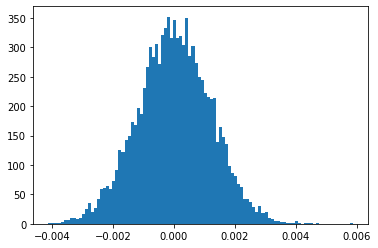

In [29]:
plt.hist(p_diffs, bins=100);

The distribution looks 'normally distributed' and therewith as expected.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [30]:
CC=(df2[df2.landing_page == 'new_page'].converted.mean() - df2[df2.landing_page == 'old_page'].converted.mean())
CC


-0.0015782389853555567

In [31]:
(np.array(p_diffs) > CC).mean()

0.905

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer**
- The above shows that over 90% of all simulations under the null have differences of $p_{new} - p_{old}$ larger than observed in the data. **In fact, the differences of both pages are significant.**
- The value of over 90% is called the p-value.
- This indicates that, if we were rejecting the null, we were likely by 90% of making a *"type I"* mistake (null being true, but assuming the alternative or - in other words - implementing the new site, although the old one is in fact better).
- This is much higher than the targeted maximum "type I error rate" of 5%.
- **Based on the analysis above, I therefore would not recommend to change the site to a new version.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [32]:
import statsmodels.api as sm

convert_old = df2[(df2.converted == 1) & (df2.landing_page == 'old_page')].shape[0]
convert_new = df2[(df2.converted == 1) & (df2.landing_page == 'new_page')].shape[0]
n_old = df2[df2.landing_page == 'old_page'].shape[0]
n_new = df2[df2.landing_page == 'new_page'].shape[0]

print('convert_old:\t', convert_old)
print('convert_new:\t', convert_new)
print('n_old:\t\t', n_old)
print('n_new:\t\t', n_new)

convert_old:	 17489
convert_new:	 17264
n_old:		 145274
n_new:		 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [33]:
z_score, p_value = sm.stats.proportions_ztest(count=[convert_old, convert_new], nobs=[n_old, n_new], alternative='smaller')

print('p_value:\t', p_value)
print('z_score:\t', z_score)

p_value:	 0.9050583127590245
z_score:	 1.3109241984234394


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Anwer**
- The p-value is approximately the same as above and also indicates that the new page should not be implemented (if we don't like to risk to make a type I-error).
- The z-score (indicating "how far" in terms of standard deviation the observation lies away from the mean) indicates exactly the same.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer**
- In this approach we are trying to classify weather a conversion happens or not.
- Therefore this is a case for **logistic regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [34]:
df2['intercept'] = 1
df2['ab_page'] = 1
df2.loc[df2.group == 'control', 'ab_page'] = 0
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [35]:
model = sm.Logit(df2.converted, df2[['intercept', 'ab_page']])
regression = model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [36]:
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 07 Sep 2020   Pseudo R-squ.:               8.077e-06
Time:                        22:02:25   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

In [37]:
# Just checking some numbers
print('According to linear regression:')
print('conversion rate of "control page":\t\t', np.exp(-1.9888))
print('change of rate with implementing "new page":\t', np.exp(-0.0150) - 1) 
print('\nFurther checks')
print('Change in rate according to data:\t\t', convert_new * n_old / (convert_old * n_new) - 1) 
print('Approximation of previous p-value:\t\t', np.exp(-0.190/2))

According to linear regression:
conversion rate of "control page":		 0.13685955841614492
change of rate with implementing "new page":	 -0.014888060396937353

Further checks
Change in rate according to data:		 -0.013109788458948168
Approximation of previous p-value:		 0.9093729344682314


**Answer**
- The logistic regression indicates that the conversion rate changes (not drops!) by approx 1.5% ($= e^{-0.0150} - 1$) if the new page is being implemented.
- Here, the p-value indicates, how significant this (logarithmic) change in conversion rate is (in both directions, having a steeper or flatter slope!). Previous p-value can be approximated by exponentiating half of the p-value here.
- Main reason is that here the hypothesis are:  
    $H_{0}: p_{new}=p_{old}$ (instead of $\le$)  
    $H_{0}: p_{new}\ne p_{old}$ (instead of $>$)  
    This means here, we have a two tailed test (instead of a one tailed one), as the null hypothesis of a logistic regression is
    *"that the probability of a particular value of the nominal variable is not associated with the value of the measurement variable; in other words, the line describing the relationship between the measurement variable and the probability of the nominal variable has a slope of zero.* (see [biostatshandbook.com](http://www.biostathandbook.com/simplelogistic.html))

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer**  

There may well be other factors influencing conversion rate. Of course these factors must be measured, when testing statistically, and relevant for later production (identifiable when calling the page and not confusing individual users with random page designs). Among obvious ones are
- Change aversion (and also novelty effect) may affect conversion rate
- Countries from where the page is being called (identifiable by ip address) may correlate with different favourite designs.
- Browsers may indicate different user groups (like apple vs. linux vs. microsoft users) (but this may be risky as same users may use different devices)

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [39]:
countries_df = pd.read_csv('countries.csv')
countries_df.user_id = countries_df.user_id.astype(str)
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [40]:
### Create the necessary dummy variables
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new.country)
df_new.head()

model = sm.Logit(df_new.converted, df_new[['intercept', 'CA', 'US']])
model.fit(disp=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Mon, 07 Sep 2020   Pseudo R-squ.:               1.521e-05
Time:                        22:13:11   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9868      0.011   -174.174      0.000      -2.009      -1.964
CA            -0.0507      0.028     -1.786      0.074      -0.106       0.005
US            -0.0099      0.013     -0.746      0.456      -0.036       0.016
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

Interactions (as polynominal terms of a higher order regre
ssion) of `ab_page` and countries only make sense when combining the page type `ab_page` and a representative of the countries (here: `CA` or `US`) in second order. 2nd or higher order combinations of `ab_page` or any country just reproduces the value and combinations of `countries` are logically and mathematically meaningless (all produce 0).  

For that reason, we can map all sensible combinations by adding term of "`ab_page` $*$ `CA`" and "`ab_test` $*$ `US`":

In [41]:
df_int = df_new[['converted', 'intercept', 'ab_page', 'CA', 'US']].copy()
df_int['ab_page_CA_interact'] = df_int['ab_page'] * df_int['CA']
df_int['ab_page_US_interact'] = df_int['ab_page'] * df_int['US']
df_int.head()

,converted,intercept,ab_page,CA,US,ab_page_CA_interact,ab_page_US_interact
user_id,,,,,,,
834778,0,1,0,0,0,0,0
928468,0,1,1,0,1,0,1
822059,1,1,1,0,0,0,0
711597,0,1,0,0,0,0,0
710616,0,1,1,0,0,0,0


Now, we can check "full blown" interactions:

In [42]:
### Fit Your Linear Model And Obtain the Results
model = sm.Logit(df_int.converted, df_int[['intercept', 'ab_page', 'CA', 'US', 'ab_page_CA_interact', 'ab_page_US_interact']])
model.fit(disp=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Mon, 07 Sep 2020   Pseudo R-squ.:               3.482e-05
Time:                        22:13:22   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept              -1.9922      0.016   -123.457      0.000      -2.024      -1.961
ab_page                 0.0108      0.023      0.475      0.635      -0.034       0.056
CA                     -0.0118      0.040     -0.296      0.767      -0.090       0.066
US                      0.0057      0.019      0.306      0.760      -0.031       0.043
ab_page_CA_interact    -0.0783      0.057     -1.378      0.168      -0.190       0.033
ab_page_US_interact    -0.0314      0.027     -1.181      0.238      -0.084       0.021
=======================================================================================
"""

<a id='conclusions'></a>
## Conclusions

- Also further investing on the influence of countries on conversion rate and interaction, gives **no reason for the company to change to the new site** (given that there should be a less than 5% risk of making a type I-error).

# Going Beyond the Scope of This Exercise

It may be that change aversion negatively influences conversion rate and that taking more time for the test may lead to other results.  
So, beyond the scope of this exercise, I'd like to examine the influence of time.  

First, we try to visualize if there is any temporal trend in conversions in favour of change aversion at all.

In [43]:
dfc = df2[['timestamp', 'converted', 'ab_page']].sort_values('timestamp').set_index('timestamp').copy()

In [44]:
dfc['conv_cum_tot'] = dfc.converted.cumsum()
dfc['conv_cum_new'] = (dfc.converted * dfc.ab_page).cumsum()

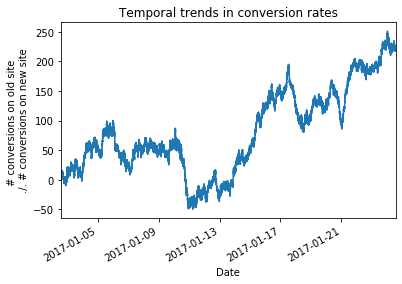

In [45]:
ax = (dfc.conv_cum_tot - 2*dfc.conv_cum_new).plot()
ax.set_title("Temporal trends in conversion rates")
ax.set_xlabel("Date")
ax.set_ylabel("# conversions on old site \n./. # conversions on new site");

## Conclusions Beyond the Scope of this Exercise

Although the graph above is not crystal clear, it seems pretty obvious that the conversions on the old side are slightly gaining more weight over time.  
Anyway, there is no trend in favour of more conversions on the new site over time, and so I conclude that there's no evidence justifying putting more effort into the analysis of temporal trends. There probably won't be any other results, that giving the company the advice to stick with the old site.